In [1]:
import time

def timing_decorator(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        print(f"{func.__name__} took {execution_time} seconds to execute.")
        return result
    return wrapper


Testing the timing decorator with different functions :

In [2]:
@timing_decorator
def word_count_1(text):
    words = text.split()
    return len(words)

@timing_decorator
def word_count_2(text):
    words = text.split()
    unique_words = set(words)
    return len(unique_words)


In [3]:
shakespeare_text = "To be or not to be, that is the question."

count1 = word_count_1(shakespeare_text)
count2 = word_count_2(shakespeare_text)


word_count_1 took 0.0 seconds to execute.
word_count_2 took 0.0 seconds to execute.


In [4]:
@timing_decorator
def some_function():
    # some_function in your example is an empty function, it just pauses for 2 seconds using the time.sleep(2) line
    #I am using it just to test the timing decorator
    time.sleep(2)

some_function()


some_function took 2.0114455223083496 seconds to execute.


In [5]:
pip install requests


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Download Shakespear artwork ( https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt ) 

In [6]:
import requests

# URL of the Shakespearean text
url = "https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the content to a local file
    with open("shakespeare.txt", "wb") as file:
        file.write(response.content)
    print("Shakespearean text downloaded and saved as 'shakespeare.txt'.")
else:
    print("Failed to download the Shakespearean text.")


Shakespearean text downloaded and saved as 'shakespeare.txt'.


Create 2 functions that count the number of appearances of each word in this text:
 a. using a dictionary b. using the Counter function 

In [7]:
# Read the Shakespearean text from the 'shakespeare.txt' file
with open("shakespeare.txt", "r") as file:
    shakespeare_text = file.read()

In [8]:
@timing_decorator
def word_count_dictionary(text):
    words = text.split()
    word_count = {}
    for word in words:
        word = word.lower()
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
    return word_count

word_count_dict = word_count_dictionary(shakespeare_text)


word_count_dictionary took 0.3972952365875244 seconds to execute.


In [9]:
from collections import Counter

@timing_decorator
def word_count_counter(text):
    words = text.split()
    word_count = Counter(words)
    return word_count

word_count_ctr = word_count_counter(shakespeare_text)


word_count_counter took 0.25891733169555664 seconds to execute.


What is the time taken for both implementations for this task? Why is it different? What are the specificities of the underlying data structures (especially the dictionary)? 

In [10]:
# Call the functions to measure execution time
word_count_dict = word_count_dictionary(shakespeare_text)
word_count_ctr = word_count_counter(shakespeare_text)


word_count_dictionary took 0.47302961349487305 seconds to execute.
word_count_counter took 0.21587634086608887 seconds to execute.


The difference in execution time is due to the specificities of the underlying data structures and how the word counting is implemented.

In the word_count_dictionary implementation, the code splits the text into words and iterates over each word, and for each word it checks if it's already in the dictionary. If it is, it increments the count for that word, otherwise, it adds the word to the dictionary with a count of 1. This can be computationally expensive, especially for a large text like Shakespeare's text.

In the word_count_counter implementation, the code also splits the text into words. The Counter class counts words using an underlying dictionary-like structure that is specifically designed for efficient counting . It automatically increments the counts as it iterates over the words in the text, which means that the data structure is optimized for counting, resulting in faster execution.

# To be more precise, run this experiment 100 times and plot the two distributions of execution times.

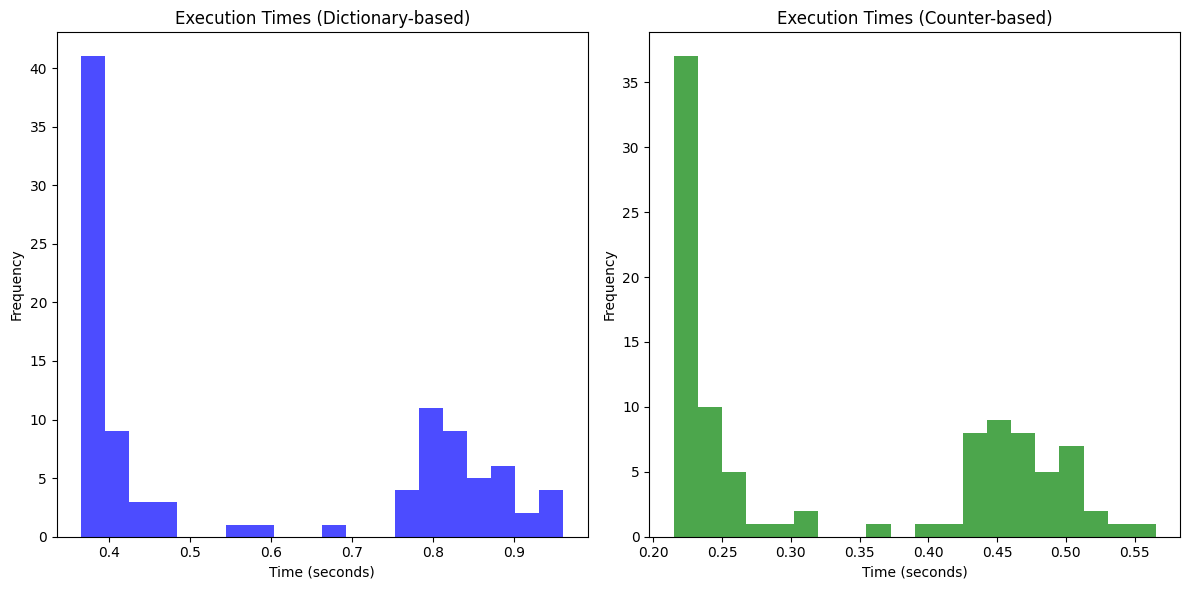

In [14]:
import time
import urllib.request
from collections import Counter
import matplotlib.pyplot as plt

# Decorator for timing
def timing_decorator(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        return end_time - start_time  # Return execution time
    return wrapper

# Function to count words using a dictionary
@timing_decorator
def word_count_dictionary(text):
    words = text.split()
    word_count = {}
    for word in words:
        word = word.lower()
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
    return word_count

# Function to count words using Counter
@timing_decorator
def word_count_counter(text):
    words = text.split()
    word_count = Counter(words)
    return word_count

# Download the Shakespearean text
url = "https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt"
response = urllib.request.urlopen(url)
shakespeare_text = response.read().decode('utf-8')

# Number of iterations for the experiment
num_iterations = 100

# Lists to store execution times
execution_times_dict = []
execution_times_ctr = []

# Run the experiment 100 times
for _ in range(num_iterations):
    execution_time_dict = word_count_dictionary(shakespeare_text)
    execution_time_ctr = word_count_counter(shakespeare_text)
    
    execution_times_dict.append(execution_time_dict)
    execution_times_ctr.append(execution_time_ctr)

# Plot the distributions of execution times
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(execution_times_dict, bins=20, color='b', alpha=0.7)
plt.title('Execution Times (Dictionary-based)')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(execution_times_ctr, bins=20, color='g', alpha=0.7)
plt.title('Execution Times (Counter-based)')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
